In [6]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import ensemble
from sklearn import datasets
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error

from sklearn.grid_search import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier

In [7]:
df = pd.read_csv((
    "https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/"
    "master/ESS_practice_data/ESSdata_Thinkful.csv")).dropna()

# Definine outcome and predictors.
# Set our outcome to 0 and 1.
y = df['partner'] - 1
X = df.loc[:, ~df.columns.isin(['partner', 'cntry', 'idno'])]

# Make the categorical variable 'country' into dummies.
X = pd.concat([X, pd.get_dummies(df['cntry'])], axis=1)

# Create training and test sets.
offset = int(X.shape[0] * 0.9)

# Put 90% of the data in the training set.
X_train, y_train = X[:offset], y[:offset]

# And put 10% in the test set.
X_test, y_test = X[offset:], y[offset:]

In [31]:
# We'll make 500 iterations, use 2-deep trees, and set our loss function.
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}

# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']

print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


Training set accuracy:
Percent Type I errors: 0.04650845608292417
Percent Type II errors: 0.17607746863066012

Test set accuracy:
Percent Type I errors: 0.06257668711656442
Percent Type II errors: 0.18527607361963191


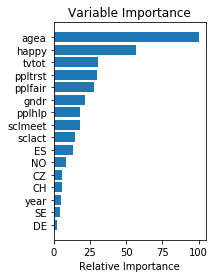

In [9]:
# We can get a measure of how important various features are by counting how many time a feature is used over the 
# course of many decision trees.

feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

**I discovered code that will help me tune parameters**

In [26]:
param_test1 = {'n_estimators':np.arange(250,500,700)}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.5, min_samples_split=500,min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(X_train, y_train)
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.75303, std: 0.01898, params: {'n_estimators': 250}],
 {'n_estimators': 250},
 0.7530345112781791)

In [28]:
param_test2 = {'max_depth':np.arange(5,16,2), 'min_samples_split':np.arange(200,1001,200)}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=250, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch2.fit(X_train, y_train)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.76510, std: 0.03779, params: {'max_depth': 5, 'min_samples_split': 200},
  mean: 0.76881, std: 0.03271, params: {'max_depth': 5, 'min_samples_split': 400},
  mean: 0.77172, std: 0.03439, params: {'max_depth': 5, 'min_samples_split': 600},
  mean: 0.77484, std: 0.02993, params: {'max_depth': 5, 'min_samples_split': 800},
  mean: 0.77472, std: 0.02879, params: {'max_depth': 5, 'min_samples_split': 1000},
  mean: 0.76106, std: 0.02572, params: {'max_depth': 7, 'min_samples_split': 200},
  mean: 0.76326, std: 0.03530, params: {'max_depth': 7, 'min_samples_split': 400},
  mean: 0.76725, std: 0.03707, params: {'max_depth': 7, 'min_samples_split': 600},
  mean: 0.77016, std: 0.03380, params: {'max_depth': 7, 'min_samples_split': 800},
  mean: 0.77596, std: 0.03252, params: {'max_depth': 7, 'min_samples_split': 1000},
  mean: 0.75736, std: 0.03453, params: {'max_depth': 9, 'min_samples_split': 200},
  mean: 0.75715, std: 0.03925, params: {'max_depth': 9, 'min_samples_split': 400},
  

In [95]:

params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance',
         'subsample': .08,
           'min_samples_split': 500,
          'min_samples_leaf': 50,
          'max_features':'sqrt'}


# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']


print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))


Training set accuracy:
Percent Type I errors: 0.056601200218221494
Percent Type II errors: 0.19094380796508456

Test set accuracy:
Percent Type I errors: 0.07484662576687116
Percent Type II errors: 0.18773006134969325


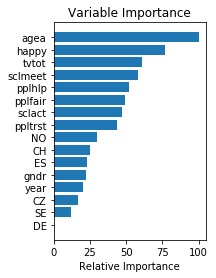

In [96]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [97]:
params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance',
           'min_samples_split': 500,
          'min_samples_leaf': 50,
          'max_features':'sqrt'}


# Initialize and fit the model.
clf = ensemble.GradientBoostingClassifier(**params)
clf.fit(X_train, y_train)

predict_train = clf.predict(X_train)
predict_test = clf.predict(X_test)

# Accuracy tables.
table_train = pd.crosstab(y_train, predict_train, margins=True)
table_test = pd.crosstab(y_test, predict_test, margins=True)

train_tI_errors = table_train.loc[0.0,1.0] / table_train.loc['All','All']
train_tII_errors = table_train.loc[1.0,0.0] / table_train.loc['All','All']

test_tI_errors = table_test.loc[0.0,1.0]/table_test.loc['All','All']
test_tII_errors = table_test.loc[1.0,0.0]/table_test.loc['All','All']


print((
    'Training set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}\n\n'
    'Test set accuracy:\n'
    'Percent Type I errors: {}\n'
    'Percent Type II errors: {}'
).format(train_tI_errors, train_tII_errors, test_tI_errors, test_tII_errors))



Training set accuracy:
Percent Type I errors: 0.04800872885979269
Percent Type II errors: 0.1815330060010911

Test set accuracy:
Percent Type I errors: 0.05889570552147239
Percent Type II errors: 0.18650306748466258


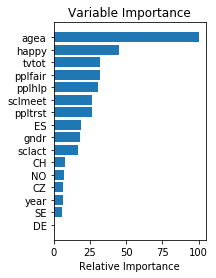

In [98]:
feature_importance = clf.feature_importances_

# Make importances relative to max importance.
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

**Original:**

**params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance'}**

Training set accuracy:
Percent Type I errors: 0.04650845608292417
Percent Type II errors: 0.17607746863066012

Test set accuracy:
Percent Type I errors: 0.06257668711656442
Percent Type II errors: 0.18527607361963191


**I added 2 new parameters, subsample of .08 and max depth of 8 and the training and test set accuracy declined.**  

Training set accuracy:
Percent Type I errors: 0.25245499181669395
Percent Type II errors: 0.18016912165848337

Test set accuracy:
Percent Type I errors: 0.10184049079754601
Percent Type II errors: 0.2650306748466258

**params = {'n_estimators': 500,
          'max_depth': 9,
          'loss': 'deviance',
         'subsample': .08,
         'min_samples_leaf': 60}**
         
      Training set accuracy:
Percent Type I errors: 0.0641025641025641
Percent Type II errors: 0.161620294599018

Test set accuracy:
Percent Type I errors: 0.1116564417177914
Percent Type II errors: 0.1656441717791411   


**params = {'n_estimators': 250,
          'max_depth': 7,
          'loss': 'deviance',
         'subsample': .08,
          'min_samples_split': 500,
          'min_samples_leaf':50,
          'max_features':'sqrt'}**


Training set accuracy:
Percent Type I errors: 0.045280960174577195
Percent Type II errors: 0.20199127114020732

Test set accuracy:
Percent Type I errors: 0.053987730061349694
Percent Type II errors: 0.2098159509202454


**params = {'n_estimators': 500,
          'max_depth': 2,
          'loss': 'deviance',
           'min_samples_split': 500,
          'min_samples_leaf': 50,
          'max_features':'sqrt'}**

Training set accuracy:
Percent Type I errors: 0.04800872885979269
Percent Type II errors: 0.1815330060010911

Test set accuracy:
Percent Type I errors: 0.05889570552147239
Percent Type II errors: 0.18650306748466258


**I was unable to improve the test set accuracy but it by adding and adjusting parameters I was able to see differing results depending on values and parameters added.  The tuning mechanism that tests a range of values is a useful tool for estimating values of the parameters.** 